In [5]:
import pickle
import numpy as np


with open('svm_pois_ds_10', 'rb') as file_1:
    svm_pois_ds_10_array = pickle.load(file_1)
# print(pois_ds_ridge_10_array.shape)

with open('svm_pois_ds_15', 'rb') as file_1:
    svm_pois_ds_15_array = pickle.load(file_1)
    
with open('svm_pois_ds_20', 'rb') as file_1:
    svm_pois_ds_20_array = pickle.load(file_1)
    
with open('svm_pois_ds_25', 'rb') as file_1:
    svm_pois_ds_25_array = pickle.load(file_1)
    
with open('svm_pois_ds_30', 'rb') as file_1:
    svm_pois_ds_30_array = pickle.load(file_1)
    
with open('svm_pois_ds_35', 'rb') as file_1:
    svm_pois_ds_35_array = pickle.load(file_1)
    
with open('svm_pois_ds_40', 'rb') as file_1:
    svm_pois_ds_40_array = pickle.load(file_1)
    
with open('svm_pois_ds_y_10', 'rb') as file_1:
    svm_pois_ds_y_10_array = pickle.load(file_1)
# print(pois_ds_ridge_10_array.shape)

with open('svm_pois_ds_y_15', 'rb') as file_1:
    svm_pois_ds_y_15_array = pickle.load(file_1)
    
with open('svm_pois_ds_y_20', 'rb') as file_1:
    svm_pois_ds_y_20_array = pickle.load(file_1)
    
with open('svm_pois_ds_y_25', 'rb') as file_1:
    svm_pois_ds_y_25_array = pickle.load(file_1)
    
with open('svm_pois_ds_y_30', 'rb') as file_1:
    svm_pois_ds_y_30_array = pickle.load(file_1)
    
with open('svm_pois_ds_y_35', 'rb') as file_1:
    svm_pois_ds_y_35_array = pickle.load(file_1)
    
with open('svm_pois_ds_y_40', 'rb') as file_1:
    svm_pois_ds_y_40_array = pickle.load(file_1)
    
with open('ridge_tr_X', 'rb') as file_1:
    tr_X_array_0 = pickle.load(file_1)
    
with open('ridge_tr_y', 'rb') as file_1:
    tr_y_array_0 = pickle.load(file_1)

with open('spambase_test_x', 'rb') as file_1:
    test_X_array = pickle.load(file_1)
    
with open('spambase_test_y', 'rb') as file_1:
    test_y_array = pickle.load(file_1)    
    
tr_X_array = np.append(tr_X_array_0, svm_pois_ds_40_array, axis = 0)
tr_y_array = np.append(tr_y_array_0, svm_pois_ds_y_40_array, axis = 0)
tr_y_array.shape

(4200,)

In [2]:
from mrmr import mrmr_classif
import pandas as pd
from sklearn.datasets import make_classification

# create some data
# X, y = make_classification(n_samples = 1000, n_features = 50, n_informative = 10, n_redundant = 40)
X = pd.DataFrame(tr_X_array)
y = pd.Series(tr_y_array)

# use mrmr classification
selected_features = mrmr_classif(X, y, K = 20)

100%|██████████| 20/20 [00:00<00:00, 48.40it/s]


In [3]:
selected_features

[20, 56, 15, 18, 22, 6, 51, 7, 8, 35, 17, 2, 52, 16, 5, 23, 4, 3, 24, 9]

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from lassonet import LassoNetClassifier


import pandas as pd


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array_0, tr_y_array_0)

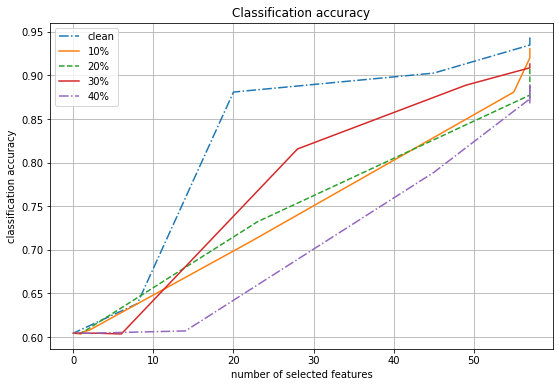

In [9]:
#!/usr/bin/env python
# coding: utf-8

"""
Lassonet Demo Notebook - PyTorch

This notebook illustrates the Lassonet method for
feature selection on a classification task.
We will run Lassonet over [the Mice Dataset](https://archive.ics.uci.edu/ml/datasets/Mice%20Protein%20Expression).
This dataset consists of protein expression levels measured in the cortex of normal and trisomic mice who had been exposed to different experimental conditions. Each feature is the expression level of one protein.
"""
# First we import a few necessary packages


import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from lassonet import LassoNetClassifier


import pandas as pd


def load_mice():
    df = pd.read_csv("./spambase/spambase.data")
    # y = list(df[df.columns[57]].itertuples(False))
    y = list(df[df.columns[57]])
    classes = {lbl: i for i, lbl in enumerate(sorted(set(y)))}
    y = np.array([classes[lbl] for lbl in y])
    feats = df.columns[0:57]
    X = df[feats].fillna(df.groupby(y)[feats].transform("mean")).values
    X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
    return X, y


X, y = load_mice()


X_train, X_test, y_train, y_test = train_test_split(X, y)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(X_train, y_train)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "-.",label='clean')
plt.legend()
plt.xlabel("number of selected features")
plt.ylabel("classification accuracy")
plt.title("Classification accuracy")
plt.savefig("accuracy.png")




#加入对抗样本


#10%
tr_X_array = np.append(X_train, svm_pois_ds_10_array, axis = 0)
tr_y_array = np.append(y_train, svm_pois_ds_y_10_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))


plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "-",label='10%')
plt.legend()


# #15%
# tr_X_array = np.append(X_train, ridge_pois_ds_15_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_15_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = "-",label='15%')
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")

#20%
tr_X_array = np.append(X_train, svm_pois_ds_20_array, axis = 0)
tr_y_array = np.append(y_train, svm_pois_ds_y_20_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "--",label='20%')
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")


# #25%
# tr_X_array = np.append(X_train, ridge_pois_ds_25_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_25_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = ":",label='25%')
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")

#30%
tr_X_array = np.append(X_train, svm_pois_ds_30_array, axis = 0)
tr_y_array = np.append(y_train, svm_pois_ds_y_30_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "solid",label='30%')
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")

# #35%
# tr_X_array = np.append(X_train, ridge_pois_ds_35_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_35_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = ":",label='35%')
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")

#40%
tr_X_array = np.append(X_train, svm_pois_ds_40_array, axis = 0)
tr_y_array = np.append(y_train, svm_pois_ds_y_40_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "-.",label='40%')
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")

plt.show()


# 针对ridge生成的对抗样本：
## 10%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 44, 39, 9, 25]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 44, 39, 9, 25, 18, 51, 26, 10, 38]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 44, 39, 9, 25, 18, 51, 26, 10, 38]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 44, 39, 9, 25, 18, 51, 26, 10, 38, 24, 2, 4, 28, 17, 29, 22, 15, 27, 56]

## 15%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 39, 38, 18, 26]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 39, 38, 18, 26, 25, 9, 51, 22, 24]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 39, 38, 18, 26, 25, 9, 51, 22, 24, 56, 1, 5, 2, 52]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 39, 38, 18, 26, 25, 9, 51, 22, 24, 56, 1, 5, 2, 52, 29, 4, 44, 15, 27]

## 20%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 37, 39, 18, 51]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 37, 39, 18, 51, 50, 56, 4, 24, 52]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 37, 39, 18, 51, 50, 56, 4, 24, 52, 9, 27, 22, 26, 1]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 37, 39, 18, 51, 50, 56, 4, 24, 52, 9, 27, 22, 26, 1, 25, 5, 15, 29, 2]

## 25%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 37, 27, 4, 56
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 37, 27, 4, 56, 18, 24, 52, 1, 25]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 37, 27, 4, 56, 18, 24, 52, 1, 25, 9, 51, 29, 26, 5]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 37, 27, 4, 56, 18, 24, 52, 1, 25, 9, 51, 29, 26, 5, 50, 47, 15, 14, 36]

## 30%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 33, 37, 56, 50]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 33, 37, 56, 50, 18, 52, 4, 27, 5]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 33, 37, 56, 50, 18, 52, 4, 27, 5, 24, 51, 1, 47, 15]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 33, 37, 56, 50, 18, 52, 4, 27, 5, 24, 51, 1, 47, 15, 26, 9, 29, 22, 25]

## 35%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [56, 50, 35, 9, 47]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [56, 50, 35, 9, 47, 20, 37, 18, 27, 5]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [56, 50, 35, 9, 47, 20, 37, 18, 27, 5, 24, 15, 52, 36, 4]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [56, 50, 35, 9, 47, 20, 37, 18, 27, 5, 24, 15, 52, 36, 4, 29, 14, 26, 51, 40]

## 40%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [56, 45, 47, 9, 27]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [56, 45, 47, 9, 27, 37, 20, 5, 15, 1]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [56, 45, 47, 9, 27, 37, 20, 5, 15, 1, 25, 18, 29, 52, 36]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [56, 45, 47, 9, 27, 37, 20, 5, 15, 1, 25, 18, 29, 52, 36, 4, 14, 35, 51, 16]


# 针对logistic生成的对抗样本
## 10%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [18, 43, 38, 25, 12]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [18, 43, 38, 25, 12, 7, 23, 45, 31, 20]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [18, 43, 38, 25, 12, 7, 23, 45, 31, 20, 9, 1, 37, 0, 4]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [18, 43, 38, 25, 12, 7, 23, 45, 31, 20, 9, 1, 37, 0, 4, 29, 16, 36, 52, 35]

## 15%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [9, 19, 7, 38, 25]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [9, 19, 7, 38, 25, 14, 1, 4, 39, 10]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [9, 19, 7, 38, 25, 14, 1, 4, 39, 10, 49, 29, 6, 54, 32]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [9, 19, 7, 38, 25, 14, 1, 4, 39, 10, 49, 29, 6, 54, 32, 8, 53, 11, 12, 15]

## 20%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [1, 25, 9, 38, 31]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [1, 25, 9, 38, 31, 23, 29, 14, 20, 33]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [1, 25, 9, 38, 31, 23, 29, 14, 20, 33, 45, 35, 10, 22, 39]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [1, 25, 9, 38, 31, 23, 29, 14, 20, 33, 45, 35, 10, 22, 39, 18, 5, 37, 56, 44]

## 25%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [37, 10, 38, 48, 9]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [37, 10, 38, 48, 9, 35, 25, 23, 52, 55]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [37, 10, 38, 48, 9, 35, 25, 23, 52, 55, 31, 4, 18, 33, 30]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [37, 10, 38, 48, 9, 35, 25, 23, 52, 55, 31, 4, 18, 33, 30, 56, 20, 6, 14, 39]

## 30%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [55, 46, 38, 1, 37]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [55, 46, 38, 1, 37, 11, 43, 48, 18, 3]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [55, 46, 38, 1, 37, 11, 43, 48, 18, 3, 41, 5, 29, 56, 28]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [55, 46, 38, 1, 37, 11, 43, 48, 18, 3, 41, 5, 29, 56, 28, 9, 13, 54, 19, 33]

## 35%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [55, 46, 38, 1, 37]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [55, 46, 38, 1, 37, 11, 43, 48, 18, 3]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [55, 46, 38, 1, 37, 11, 43, 48, 18, 3, 41, 5, 29, 56, 28]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [55, 46, 38, 1, 37, 11, 43, 48, 18, 3, 41, 5, 29, 56, 28, 9, 13, 54, 19, 33]

## 40%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [18, 25, 32, 10, 23]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [18, 25, 32, 10, 23, 26, 9, 29, 20, 52]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [18, 25, 32, 10, 23, 26, 9, 29, 20, 52, 14, 42, 51, 45, 27]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [18, 25, 32, 10, 23, 26, 9, 29, 20, 52, 14, 42, 51, 45, 27, 22, 4, 28, 12, 38]


# 针对svm生成的对抗样本
## 10%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 21, 51, 6, 22]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 21, 51, 6, 22, 24, 23, 18, 52, 15]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 21, 51, 6, 22, 24, 23, 18, 52, 15, 7, 5, 56, 25, 2]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 21, 51, 6, 22, 24, 23, 18, 52, 15, 7, 5, 56, 25, 2, 16, 4, 9, 38, 17]

## 15%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 53, 22, 51, 6]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 53, 22, 51, 6, 25, 56, 18, 5, 4]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 53, 22, 51, 6, 25, 56, 18, 5, 4, 52, 19, 23, 2, 24]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 53, 22, 51, 6, 25, 56, 18, 5, 4, 52, 19, 23, 2, 24, 32, 26, 38, 7, 9]

## 20%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 21, 15, 22, 6]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 21, 15, 22, 6, 51, 25, 18, 23, 52]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 21, 15, 22, 6, 51, 25, 18, 23, 52, 38, 4, 19, 14, 44]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 21, 15, 22, 6, 51, 25, 18, 23, 52, 38, 4, 19, 14, 44, 24, 56, 2, 9, 5]

## 25%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [18, 21, 55, 15, 25]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [18, 21, 55, 15, 25, 5, 9, 51, 20, 6]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [18, 21, 55, 15, 25, 5, 9, 51, 20, 6, 22, 38, 23, 4, 56]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [18, 21, 55, 15, 25, 5, 9, 51, 20, 6, 22, 38, 23, 4, 56, 7, 52, 17, 24, 8]

## 30%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [20, 53, 51, 25, 9]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [20, 53, 51, 25, 9, 6, 22, 4, 23, 26]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [20, 53, 51, 25, 9, 6, 22, 4, 23, 26, 18, 38, 15, 5, 52]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [20, 53, 51, 25, 9, 6, 22, 4, 23, 26, 18, 38, 15, 5, 52, 21, 2, 8, 29, 36]

## 35%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [25, 32, 26, 20, 56]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [25, 32, 26, 20, 56, 51, 18, 4, 22, 23]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [25, 32, 26, 20, 56, 51, 18, 4, 22, 23, 15, 24, 7, 52, 38]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [25, 32, 26, 20, 56, 51, 18, 4, 22, 23, 15, 24, 7, 52, 38, 2, 10, 14, 6, 47]

## 40%投毒mrMR投毒之前/之后特征选择:
## 5 : [18, 56, 15, 20, 51] -> [18, 56, 15, 25, 6]
## 10: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5] -> [18, 56, 15, 25, 6, 22, 20, 9, 51, 5]
## 15: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7] -> [18, 56, 15, 25, 6, 22, 20, 9, 51, 5, 23, 4, 2, 52, 16]
## 20: [18, 56, 15, 20, 51, 6, 22, 24, 52, 5, 4, 23, 25, 26, 7, 21, 2, 16, 36, 17] -> [18, 56, 15, 25, 6, 22, 20, 9, 51, 5, 23, 4, 2, 52, 16, 38, 17, 3, 24, 10]


In [7]:
import pickle
import numpy as np


with open('ridge_pois_ds_10', 'rb') as file_1:
    ridge_pois_ds_10_array = pickle.load(file_1)
# print(pois_ds_ridge_10_array.shape)

with open('ridge_pois_ds_15', 'rb') as file_1:
    ridge_pois_ds_15_array = pickle.load(file_1)
    
with open('ridge_pois_ds_20', 'rb') as file_1:
    ridge_pois_ds_20_array = pickle.load(file_1)
    
with open('ridge_pois_ds_25', 'rb') as file_1:
    ridge_pois_ds_25_array = pickle.load(file_1)
    
with open('ridge_pois_ds_30', 'rb') as file_1:
    ridge_pois_ds_30_array = pickle.load(file_1)
    
with open('ridge_pois_ds_35', 'rb') as file_1:
    ridge_pois_ds_35_array = pickle.load(file_1)
    
with open('ridge_pois_ds_40', 'rb') as file_1:
    ridge_pois_ds_40_array = pickle.load(file_1)
    
with open('ridge_pois_ds_y_10', 'rb') as file_1:
    ridge_pois_ds_y_10_array = pickle.load(file_1)
# print(pois_ds_ridge_10_array.shape)

with open('ridge_pois_ds_y_15', 'rb') as file_1:
    ridge_pois_ds_y_15_array = pickle.load(file_1)
    
with open('ridge_pois_ds_y_20', 'rb') as file_1:
    ridge_pois_ds_y_20_array = pickle.load(file_1)
    
with open('ridge_pois_ds_y_25', 'rb') as file_1:
    ridge_pois_ds_y_25_array = pickle.load(file_1)
    
with open('ridge_pois_ds_y_30', 'rb') as file_1:
    ridge_pois_ds_y_30_array = pickle.load(file_1)
    
with open('ridge_pois_ds_y_35', 'rb') as file_1:
    ridge_pois_ds_y_35_array = pickle.load(file_1)
    
with open('ridge_pois_ds_y_40', 'rb') as file_1:
    ridge_pois_ds_y_40_array = pickle.load(file_1)
    
with open('ridge_tr_X', 'rb') as file_1:
    tr_X_array_0 = pickle.load(file_1)
    
with open('ridge_tr_y', 'rb') as file_1:
    tr_y_array_0 = pickle.load(file_1)

with open('spambase_test_x', 'rb') as file_1:
    test_X_array = pickle.load(file_1)
    
with open('spambase_test_y', 'rb') as file_1:
    test_y_array = pickle.load(file_1)    


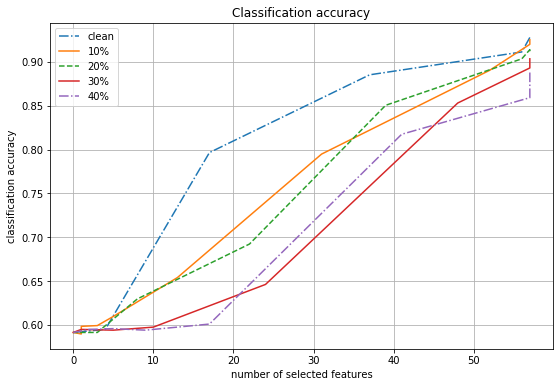

In [8]:
#!/usr/bin/env python
# coding: utf-8

"""
Lassonet Demo Notebook - PyTorch

This notebook illustrates the Lassonet method for
feature selection on a classification task.
We will run Lassonet over [the Mice Dataset](https://archive.ics.uci.edu/ml/datasets/Mice%20Protein%20Expression).
This dataset consists of protein expression levels measured in the cortex of normal and trisomic mice who had been exposed to different experimental conditions. Each feature is the expression level of one protein.
"""
# First we import a few necessary packages


import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from lassonet import LassoNetClassifier


import pandas as pd


def load_mice():
    df = pd.read_csv("./spambase/spambase.data")
    # y = list(df[df.columns[57]].itertuples(False))
    y = list(df[df.columns[57]])
    classes = {lbl: i for i, lbl in enumerate(sorted(set(y)))}
    y = np.array([classes[lbl] for lbl in y])
    feats = df.columns[0:57]
    X = df[feats].fillna(df.groupby(y)[feats].transform("mean")).values
    X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
    return X, y


X, y = load_mice()


X_train, X_test, y_train, y_test = train_test_split(X, y)

# 干净样本
model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(X_train, y_train)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "-.",label='clean')
plt.legend()
plt.xlabel("number of selected features")
plt.ylabel("classification accuracy")
plt.title("Classification accuracy")
plt.savefig("accuracy.png")



#加入对抗样本


#10%
tr_X_array = np.append(X_train, ridge_pois_ds_10_array, axis = 0)
tr_y_array = np.append(y_train, ridge_pois_ds_y_10_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))


plt.grid(True)
plt.plot(n_selected, accuracy, label = "10%",linestyle = "-")
plt.legend()


# #15%
# tr_X_array = np.append(X_train, ridge_pois_ds_15_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_15_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = "--",label = "15%")
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")


#20%
tr_X_array = np.append(X_train, ridge_pois_ds_20_array, axis = 0)
tr_y_array = np.append(y_train, ridge_pois_ds_y_20_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "--",label = "20%")
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")

# #25%
# tr_X_array = np.append(X_train, ridge_pois_ds_25_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_25_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = "None",label = "25%")
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")

#30%
tr_X_array = np.append(X_train, ridge_pois_ds_30_array, axis = 0)
tr_y_array = np.append(y_train, ridge_pois_ds_y_30_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "solid",label = "30%")
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")

# #35%
# tr_X_array = np.append(X_train, ridge_pois_ds_35_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_35_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = ":",label = "35%")
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")


#40%
tr_X_array = np.append(X_train, ridge_pois_ds_40_array, axis = 0)
tr_y_array = np.append(y_train, ridge_pois_ds_y_40_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "-.", label = "40%")
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")

plt.show()

In [1]:
import pickle
import numpy as np


with open('logistic_pois_ds_10', 'rb') as file_1:
    logistic_pois_ds_10_array = pickle.load(file_1)
# print(pois_ds_ridge_10_array.shape)

with open('logistic_pois_ds_15', 'rb') as file_1:
    logistic_pois_ds_15_array = pickle.load(file_1)
    
with open('logistic_pois_ds_20', 'rb') as file_1:
    logistic_pois_ds_20_array = pickle.load(file_1)
    
with open('logistic_pois_ds_25', 'rb') as file_1:
    logistic_pois_ds_25_array = pickle.load(file_1)
    
with open('logistic_pois_ds_30', 'rb') as file_1:
    logistic_pois_ds_30_array = pickle.load(file_1)
    
with open('logistic_pois_ds_35', 'rb') as file_1:
    logistic_pois_ds_35_array = pickle.load(file_1)
    
with open('logistic_pois_ds_40', 'rb') as file_1:
    logistic_pois_ds_40_array = pickle.load(file_1)
    
with open('logistic_pois_ds_y_10', 'rb') as file_1:
    logistic_pois_ds_y_10_array = pickle.load(file_1)
# print(pois_ds_ridge_10_array.shape)

with open('logistic_pois_ds_y_15', 'rb') as file_1:
    logistic_pois_ds_y_15_array = pickle.load(file_1)
    
with open('logistic_pois_ds_y_20', 'rb') as file_1:
    logistic_pois_ds_y_20_array = pickle.load(file_1)
    
with open('logistic_pois_ds_y_25', 'rb') as file_1:
    logistic_pois_ds_y_25_array = pickle.load(file_1)
    
with open('logistic_pois_ds_y_30', 'rb') as file_1:
    logistic_pois_ds_y_30_array = pickle.load(file_1)
    
with open('logistic_pois_ds_y_35', 'rb') as file_1:
    logistic_pois_ds_y_35_array = pickle.load(file_1)
    
with open('logistic_pois_ds_y_40', 'rb') as file_1:
    logistic_pois_ds_y_40_array = pickle.load(file_1)
    
with open('ridge_tr_X', 'rb') as file_1:
    tr_X_array_0 = pickle.load(file_1)
    
with open('ridge_tr_y', 'rb') as file_1:
    tr_y_array_0 = pickle.load(file_1)

with open('spambase_test_x', 'rb') as file_1:
    test_X_array = pickle.load(file_1)
    
with open('spambase_test_y', 'rb') as file_1:
    test_y_array = pickle.load(file_1)    


In [2]:
#!/usr/bin/env python
# coding: utf-8

"""
Lassonet Demo Notebook - PyTorch

This notebook illustrates the Lassonet method for
feature selection on a classification task.
We will run Lassonet over [the Mice Dataset](https://archive.ics.uci.edu/ml/datasets/Mice%20Protein%20Expression).
This dataset consists of protein expression levels measured in the cortex of normal and trisomic mice who had been exposed to different experimental conditions. Each feature is the expression level of one protein.
"""
# First we import a few necessary packages


import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from lassonet import LassoNetClassifier


import pandas as pd


def load_mice():
    df = pd.read_csv("./spambase/spambase.data")
    # y = list(df[df.columns[57]].itertuples(False))
    y = list(df[df.columns[57]])
    classes = {lbl: i for i, lbl in enumerate(sorted(set(y)))}
    y = np.array([classes[lbl] for lbl in y])
    feats = df.columns[0:57]
    X = df[feats].fillna(df.groupby(y)[feats].transform("mean")).values
    X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
    return X, y


X, y = load_mice()


X_train, X_test, y_train, y_test = train_test_split(X, y)

# 干净样本
model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(X_train, y_train)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "-.",label='clean')
plt.legend()
plt.xlabel("number of selected features")
plt.ylabel("classification accuracy")
plt.title("Classification accuracy")
plt.savefig("accuracy.png")



#加入对抗样本


#10%
tr_X_array = np.append(X_train, logistic_pois_ds_10_array, axis = 0)
tr_y_array = np.append(y_train, logistic_pois_ds_y_10_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))


plt.grid(True)
plt.plot(n_selected, accuracy, label = "10%",linestyle = "-")
plt.legend()


# #15%
# tr_X_array = np.append(X_train, ridge_pois_ds_15_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_15_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = "--",label = "15%")
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")


#20%
tr_X_array = np.append(X_train, logistic_pois_ds_20_array, axis = 0)
tr_y_array = np.append(y_train, logistic_pois_ds_y_20_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "--",label = "20%")
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")

# #25%
# tr_X_array = np.append(X_train, ridge_pois_ds_25_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_25_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = "None",label = "25%")
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")

#30%
tr_X_array = np.append(X_train, logistic_pois_ds_30_array, axis = 0)
tr_y_array = np.append(y_train, logistic_pois_ds_y_30_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "solid",label = "30%")
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")

# #35%
# tr_X_array = np.append(X_train, ridge_pois_ds_35_array, axis = 0)
# tr_y_array = np.append(y_train, ridge_pois_ds_y_35_array, axis = 0)


# model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
# path = model.path(tr_X_array, tr_y_array)

# n_selected = []
# accuracy = []

# for save in path:
#     model.load(save.state_dict)
#     n_selected.append(save.selected.sum())
#     y_pred = model.predict(X_test)
#     accuracy.append(accuracy_score(y_test, y_pred))

# # fig = plt.figure(figsize=(9, 6))
# plt.grid(True)
# plt.plot(n_selected, accuracy, linestyle = ":",label = "35%")
# plt.legend()
# # plt.xlabel("number of selected features")
# # plt.ylabel("classification accuracy")
# # plt.title("Classification accuracy")
# # plt.savefig("accuracy.png")


#40%
tr_X_array = np.append(X_train, logistic_pois_ds_40_array, axis = 0)
tr_y_array = np.append(y_train, logistic_pois_ds_y_40_array, axis = 0)


model = LassoNetClassifier(eps_start=1e-3, lambda_start=1000)
path = model.path(tr_X_array, tr_y_array)

n_selected = []
accuracy = []

for save in path:
    model.load(save.state_dict)
    n_selected.append(save.selected.sum())
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(n_selected, accuracy, linestyle = "-.", label = "40%")
plt.legend()
# plt.xlabel("number of selected features")
# plt.ylabel("classification accuracy")
# plt.title("Classification accuracy")
# plt.savefig("accuracy.png")

plt.show()

<Figure size 900x600 with 1 Axes>